In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

# 1. Data Preparation

## 1.3 数据变换

### 1.3.1 简单函数变换

### 1.3.2 规范化

#### 1.3.2.1 最小/最大规范化: $\large{x^*=\frac{x-min}{max-min}}$ 
映射到 [0,1] 之间，若数据集中且某个数值太大，则规范化后各值都接近0，且相差不大

#### 1.3.2.2 零/均值(标准差)规范化: $\large{x^*=\frac{x-\overline{x}}{\sigma}}$
目前用的最多的数据标准化方法

#### 1.3.2.3 小数定标规范化: $\large{x^*=\frac{x}{10^k}}$
通过移动属性值的小数位数，映射到 [-1,1] 之间，移动的小数位数取决于属性值绝对值的最大值

In [2]:
# load raw_data
feture_matrix = np.random.randn(60).reshape(30, 2)

#max-min normalization
X = (feture_matrix - feture_matrix.min()) / (feture_matrix.max() - feture_matrix.min())
X

array([[0.53403228, 0.33067604],
       [0.31194431, 0.37662431],
       [0.37549638, 0.34570596],
       [0.77219009, 0.34578318],
       [0.3765018 , 0.51080049],
       [0.90979114, 0.22672979],
       [0.29188222, 0.29126034],
       [0.30116754, 0.29845311],
       [0.60972703, 0.83901053],
       [0.58753871, 0.090489  ],
       [0.12941157, 0.37046117],
       [0.04400166, 0.58025217],
       [0.23562919, 0.77043068],
       [0.52669273, 0.35782784],
       [0.88189166, 0.40296656],
       [0.29569039, 0.        ],
       [0.72710793, 0.33931316],
       [0.26536528, 0.72899463],
       [0.73872924, 0.28475451],
       [0.45110736, 0.77575672],
       [0.88097148, 0.15862728],
       [0.25281322, 0.26414375],
       [0.32603567, 0.8327072 ],
       [0.19968314, 0.99275772],
       [0.7400227 , 0.20147531],
       [0.26344643, 0.39951656],
       [1.        , 0.53411501],
       [0.154511  , 0.5225369 ],
       [0.89105931, 0.25496913],
       [0.61009453, 0.4731644 ]])

In [3]:
# z-score
X = (feture_matrix - feture_matrix.mean()) / feture_matrix.std()
X

array([[ 0.29303504, -0.50915305],
       [-0.58304488, -0.32789893],
       [-0.3323483 , -0.44986385],
       [ 1.23250638, -0.44955926],
       [-0.32838217,  0.20139163],
       [ 1.77530717, -0.91919427],
       [-0.66218469, -0.66463783],
       [-0.62555649, -0.63626421],
       [ 0.59163139,  1.49609584],
       [ 0.50410416, -1.45662915],
       [-1.30308964, -0.35221092],
       [-1.64000975,  0.47536065],
       [-0.88408843,  1.22556597],
       [ 0.26408243, -0.40204615],
       [ 1.66525089, -0.22398553],
       [-0.64716243, -1.813585  ],
       [ 1.05466884, -0.4750818 ],
       [-0.76678718,  1.06211139],
       [ 1.10051192, -0.69030166],
       [-0.03408244,  1.24657582],
       [ 1.66162099, -1.18784115],
       [-0.81630183, -0.77160582],
       [-0.52745811,  1.47123082],
       [-1.02588634,  2.10258898],
       [ 1.1056143 , -1.01881672],
       [-0.77435654, -0.23759487],
       [ 2.13115792,  0.29336141],
       [-1.20407884,  0.24768874],
       [ 1.7014149 ,

In [4]:
# normalization by decimal scaling
X = feture_matrix / 10**np.ceil(np.log10(np.abs(feture_matrix).max()))
X

array([[ 0.01714101, -0.05965528],
       [-0.06672921, -0.04230318],
       [-0.04272914, -0.05397932],
       [ 0.10707992, -0.05395016],
       [-0.04234945,  0.00836767],
       [ 0.15904415, -0.09890997],
       [-0.07430554, -0.07454039],
       [-0.07079899, -0.07182408],
       [ 0.0457267 ,  0.13231427],
       [ 0.03734741, -0.15036051],
       [-0.13566163, -0.04463066],
       [-0.16791618,  0.03459569],
       [-0.09554917,  0.10641549],
       [ 0.01436928, -0.04940156],
       [ 0.14850808, -0.03235519],
       [-0.07286741, -0.18453315],
       [ 0.0900549 , -0.05639352],
       [-0.0843195 ,  0.0907674 ],
       [ 0.09444362, -0.07699728],
       [-0.0141751 ,  0.10842684],
       [ 0.14816057, -0.12462849],
       [-0.08905972, -0.08478081],
       [-0.06140769,  0.12993385],
       [-0.10912398,  0.19037599],
       [ 0.09493209, -0.10844718],
       [-0.08504415, -0.03365806],
       [ 0.193111  ,  0.01717226],
       [-0.12618298,  0.01279985],
       [ 0.15197019,

In [5]:
#-*- coding: utf-8 -*-
#数据规范化
import pandas as pd
import numpy as np

#datafile = '../data/normalization_data.xls' #参数初始化
#data = pd.read_excel(datafile, header=None) #读取数据
data = np.random.randn(60).reshape(30, 2)

data1 = (data - data.min()) / (data.max() - data.min()) #最小-最大规范化
print(data1)
data2 = (data - data.mean()) / data.std() #零-均值规范化
print(data2)
data3 = data / 10**np.ceil(np.log10(np.abs(data).max())) #小数定标规范化
print(data3)

[[0.71287809 0.63728507]
 [0.55966227 0.64855567]
 [0.42374164 0.20859825]
 [0.68057256 0.49362287]
 [0.38521046 0.31686083]
 [0.56258326 0.59862096]
 [0.64782763 0.39153298]
 [0.38047202 0.01597628]
 [0.63214791 0.34995942]
 [0.46696345 0.6721085 ]
 [0.53367597 0.41430268]
 [0.29359129 0.62034198]
 [0.47551761 0.64690815]
 [0.4482465  0.34507074]
 [0.37473525 0.88018492]
 [1.         0.39177921]
 [0.58606514 0.50244808]
 [0.62770521 0.4708722 ]
 [0.36928597 0.58822981]
 [0.3943292  0.30856491]
 [0.53028325 0.43361422]
 [0.47381394 0.56268143]
 [0.57287497 0.49382678]
 [0.53919342 0.36687635]
 [0.55685859 0.00598827]
 [0.         0.35979021]
 [0.97476974 0.43788173]
 [0.41783481 0.36805793]
 [0.95731062 0.62261676]
 [0.32420618 0.2234428 ]]
[[ 1.1273399   0.74841262]
 [ 0.35931064  0.80490908]
 [-0.32202254 -1.4004779 ]
 [ 0.96540108  0.02827305]
 [-0.51516887 -0.85778704]
 [ 0.37395275  0.55459998]
 [ 0.80125965 -0.48347581]
 [-0.5389214  -2.36603954]
 [ 0.72266143 -0.69187278]
 [-0.1

### 1.3.3 连续属性离散化

#### 1.3.3.1 等宽法
等宽法：类似于制作频率分布表，将属性的值域划分为相等宽度的区间，区间的个数由数据本身特点决定

#### 1.3.3.2 等频法
等频法：将相同数量的记录放到每个区间

#### 1.3.3.3 聚类
聚类：一维聚类的两个步骤，首先用聚类算法如（K-means算法）进行聚类，然后处理聚类得到的簇。

In [6]:
import pandas as pd

#datafile = '../big-data/data-anaysis/example/chapter4/chapter4/demo/data/discretization_data.xls'
#data = pd.read_excel(datafile)
data = np.random.randn(10)#.reshape(6, 10)
#取该列
#data = data[u'肝气郁结证型系数'].copy()
data = data.copy()
print(data)
k = 4

#等宽离散化
d1 = pd.cut(data, k, labels=range(k))
d1

[ 0.88288613  0.56778539 -0.33118276 -1.49554131  0.83592292 -0.58366008
  0.34344833 -0.29491103  2.37952332  1.43642066]


[2, 2, 1, 0, 2, 0, 1, 1, 3, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [7]:
#等频离散化
w = [1.0 * i / k for i in range(k+1)]
#自动计算分数位
w = pd.DataFrame(data).describe(percentiles=w)[4:4+k+1]
w = w * (1-1e-10)

d2 = pd.cut(data, w[0], labels=range(k))
d2

[3.0, 2.0, 0.0, NaN, 2.0, 0.0, 1.0, 1.0, NaN, 3.0]
Categories (4, int64): [0 < 1 < 2 < 3]

### 1.3.4 属性构造

### 1.3.5 小波变换

## 1.4 数据规约

### 1.4.1 属性规约

#### 1.4.1.1 逐步向前选择

#### 1.4.1.2 逐步向后删除

#### 1.4.1.3 决策树归纳

#### 1.4.1.4 主成分分析(PCA)

In [8]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [9]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components='mle')
pca.fit(X)
# PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_)

[0.99244289]


### 1.4.2 数值规约

#### 1.4.2.1 直方图

#### 1.4.2.2 聚类

#### 1.4.2.3 抽样
s个样本无放回简单随机抽样

s个样本有放回简单随机抽样

聚类抽样

分层抽样

#### 1.4.2.4 参数回归
简单线性模型
多元线性模型
对数线性模型(Logistic Regression)

x0: [[1 1]
 [2 2]]
f(x0): [1.87381094 2.33111636]
function:y=ax+b ( a= [0.03411438 0.42319104] b= 1.4165055212448792 )


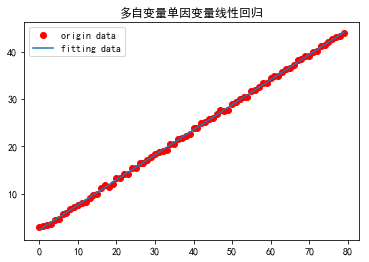

f(x0): [[15.49333333]]
function:ax+b ( a= 1.0 b= 1.4933333333333332 )


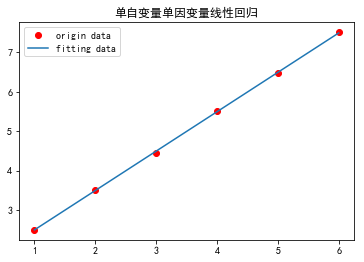

In [14]:
#-*-coding:utf-8-*-
'''
created by zwg in 2016-10-5
'''
'''
最小二乘多项式拟合
'''
import numpy
from sklearn import linear_model
from matplotlib import pyplot as pl

#单自变量单因变量线性回归
class two_fit:
	def loaddata(self, x, y):
		'''
		导入数据并进行拟合
		'''
		n = len(x)
		x = numpy.array(x)
		y = numpy.array(y)
		x = x.reshape((n, 1))
		y = y.reshape((n, 1))
		self.x = x; 
		self.y = y;
		self.reg = linear_model.LinearRegression()
		self.reg.fit(x, y)
		self.a = self.reg.coef_
		self.b = self.reg.intercept_
        
	def predict(self, x0):
		'''
		预测数据
		'''
		y0 = self.reg.predict(x0)
		return y0
    
	def getcoef(self):
		'''
		获取拟合系数
		'''
		return self.a[0, 0], self.b[0]
    
	def show(self):
		figure1 = pl.figure()
		pl.plot(self.x, self.y, 'ro', label='origin data')
		pl.plot(self.x, self.predict(self.x), label='fitting data')
		plt.title('单自变量单因变量线性回归')
		pl.legend()
		pl.show()
        
#多自变量单因变量线性回归
class n_fit:
	def loaddata(self, x, y):
		n = len(y)
		x = numpy.array(x)
		y = numpy.array(y)
		y.reshape((n, 1))
		self.x = x; self.y = y;
		self.reg = linear_model.LinearRegression()
		self.reg.fit(x, y)
		self.a = self.reg.coef_
		self.b = self.reg.intercept_
        
	def predict(self, x0):
		y0 = self.reg.predict(x0)
		return y0
    
	def getcoef(self):
		return self.a, self.b
    
	def show(self):
		figure1 = pl.figure()
		pl.plot(range(len(self.y)), self.y, 'ro', label='origin data', figure=figure1)
		pl.plot(range(len(self.y)), self.predict(self.x), label='fitting data', figure=figure1)
		plt.title('多自变量单因变量线性回归')
		pl.legend()
		pl.show()
        
#多自变量多独立因变量的线性回归
class nn_fit:
	def loaddata(self, x, y):
		x = numpy.array(x)
		y = numpy.array(y)
		reg = linear_model.LinearRegression()
		reg.fit(x, y)
		a = reg.coef_
		b = reg.intercept_
		self.x = x
		self.y = y
		self.reg = reg
		self.a = a
		self.b = b
        
	def predict(self, x0):
		y0 = self.reg.predict(x0)
		return y0
    
	def predict_one(self, x0, k):
		'''
		预测第k个函数的秩
		'''
		x0 = numpy.array(x0)
		x0.reshape((len(x0), 1))
		y0 = numpy.dot(self.a[k-1:k, :], x0.T) + self.b[k]
		return y0

#测试有效性
def test_two_fit():
	#x = numpy.arange(1, 10, 0.5)
	#y = x * 0.1 + 3
	x = [ 1, 2, 3, 4, 5, 6]
	y = [ 2.5, 3.51, 4.45, 5.52, 6.47, 7.51]
	fit = two_fit()
	fit.loaddata(x, y)
	x0 = 14
	y0 = fit.predict(x0)
	a, b = fit.getcoef()
	print('f(x0):', y0)
	print('function:ax+b (', 'a=', a, 'b=', b, ')')
	fit.show()
    
def test_n_fit():
	x1 = numpy.arange(2, 10, 0.1)
	x2 = numpy.linspace(2, 100, len(x1))
	y = x1 * 0.3 + x2 * 0.4 + 0.5
	x = numpy.c_[x1, x2]
	y1 = y + numpy.random.random(y.shape)
	nfit = n_fit()
	nfit.loaddata(x, y1)
	x0 = numpy.array([[1, 1], [2, 2]])
	y0 = nfit.predict(x0)
	a, b = nfit.getcoef()
	print('x0:', x0)
	print('f(x0):', y0)
	print('function:y=ax+b (', 'a=', a, 'b=', b, ')')
	nfit.show()
    
if __name__ == '__main__':
	test_n_fit()
	test_two_fit() #单自变量单因变量的回归测试